# Requirements

In [2]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
# Add as many imports as you need.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

# Laboratory Exercise - Run Mode (8 points)

## Mobile Device Usage and User Behavior Dataset
The dataset contains detailed information on 700 mobile device users, capturing various usage patterns and behavior classifications. The features include app usage time, screen-on time, battery drain, data consumption, and more. These metrics provide insights into the user's daily interactions with their device, such as how much time is spent on apps, the amount of screen activity, battery usage, and mobile data consumption. In addition, user demographics like age and gender are included, as well as the device model and operating system. The 'user behavior class' attribute categorizes users based on their usage patterns, ranging from light to extreme behavior. All features, except for the 'user behavior class', can be used as input variables for analysis and modeling, while the 'user behavior class' serves as the target variable for prediction. This dataset offers valuable insights for studying mobile user behavior and can be used for building predictive models in the domain of mobile technology and applications.

Load the dataset into a `pandas` data frame.

In [7]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('user_behavior_data.csv', index_col=0)
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122.0,40.0,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944.0,47.0,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,NaN,42.0,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871.0,20.0,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988.0,31.0,Female,3


Preprocess the input and the output variables appropriately.

In [9]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
df['Operating System'] = LabelEncoder().fit_transform(df['Operating System'])

df.isnull().sum()

Device Model                    0
Operating System                0
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [10]:
data['Operating System'].value_counts()

Operating System
Android    496
iOS        134
Name: count, dtype: int64

In [11]:
df['Operating System'].value_counts()

Operating System
0    496
1    134
2     70
Name: count, dtype: int64

In [12]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
columns = ['Device Model', 'Operating System', 'Gender']
data[columns] = oe.fit_transform(data[columns])
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,0.0,0.0,393,6.4,1872,67,1122.0,40.0,1.0,4
2,1.0,0.0,268,4.7,1331,42,944.0,47.0,0.0,3
3,3.0,0.0,154,4.0,761,32,NaN,42.0,1.0,2
4,0.0,0.0,239,4.8,1676,56,871.0,20.0,1.0,3
5,4.0,1.0,187,4.3,1367,58,988.0,31.0,0.0,3


In [13]:
data.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

Explore the dataset using visualizations of your choice.

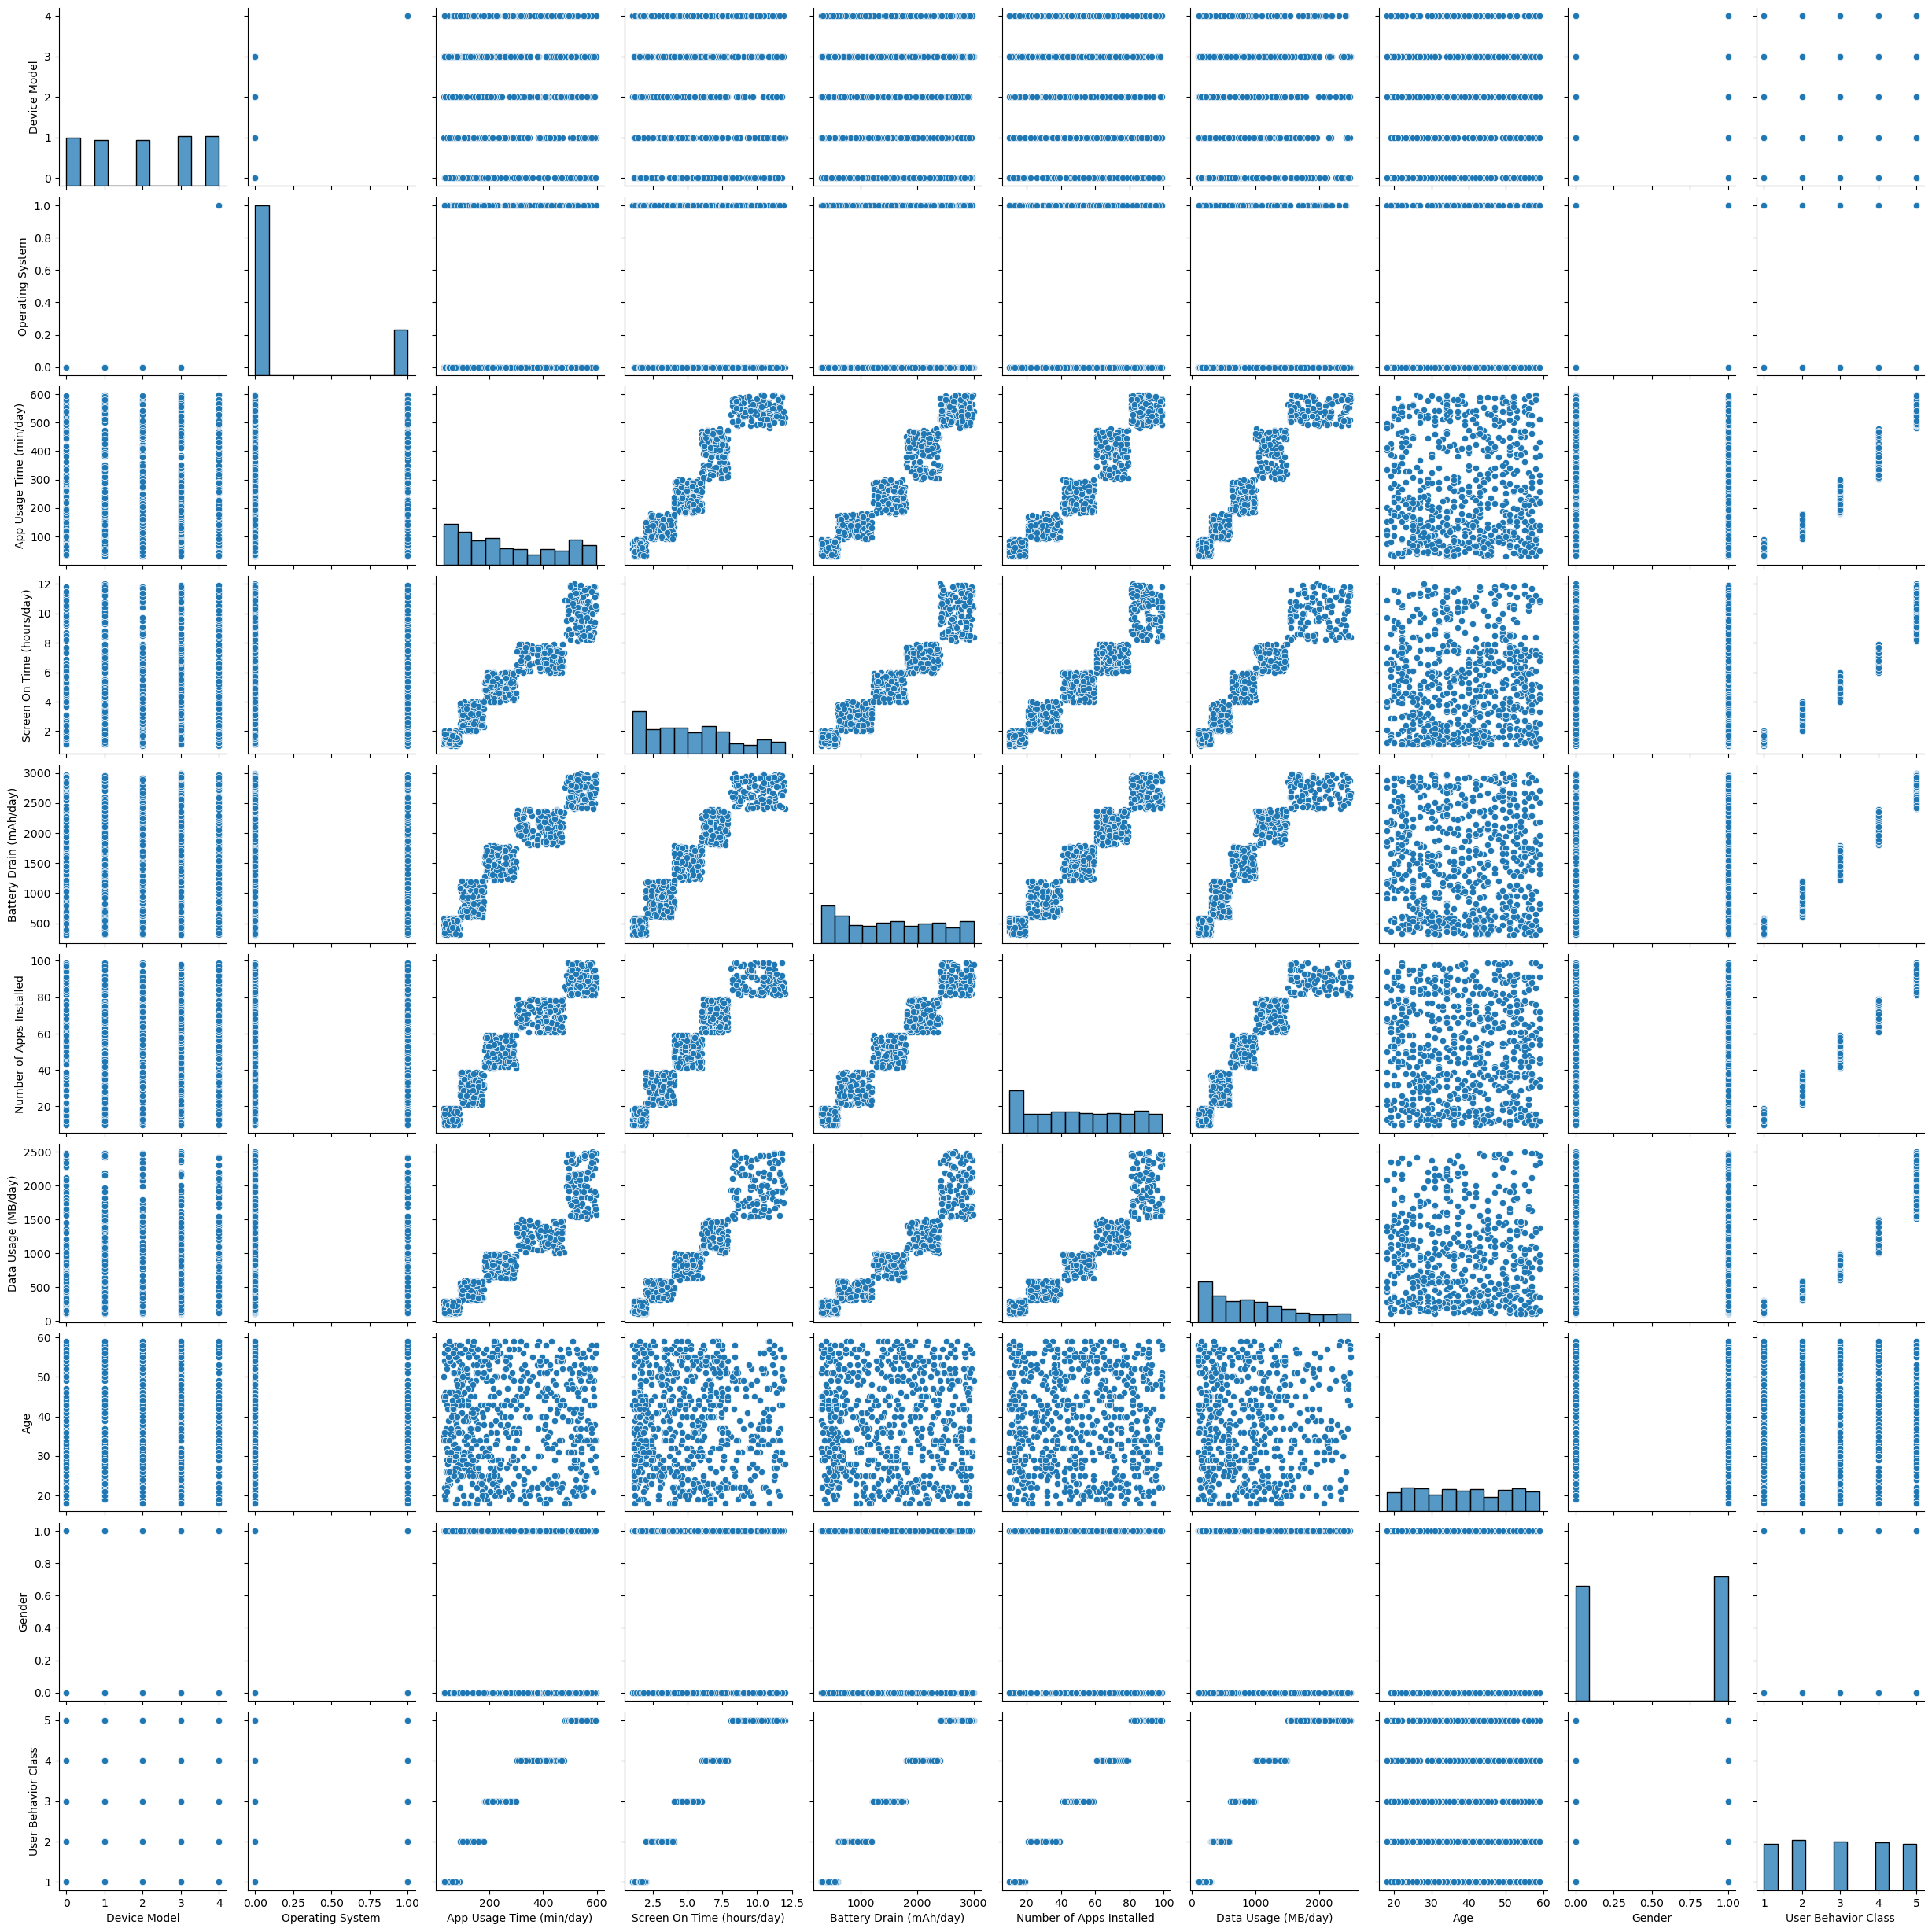

In [15]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(data)
plt.show()

Check if the dataset is balanced.

In [17]:
# Write your code here. Add as many boxes as you need.
data['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [19]:
# Write your code here. Add as many boxes as you need.
missing_values = data.isnull().sum()
missing_values_percent = missing_values / len(data) * 100
missing_values_percent

Device Model                   0.0
Operating System              10.0
App Usage Time (min/day)       0.0
Screen On Time (hours/day)     0.0
Battery Drain (mAh/day)        0.0
Number of Apps Installed       0.0
Data Usage (MB/day)           20.0
Age                            5.0
Gender                         0.0
User Behavior Class            0.0
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

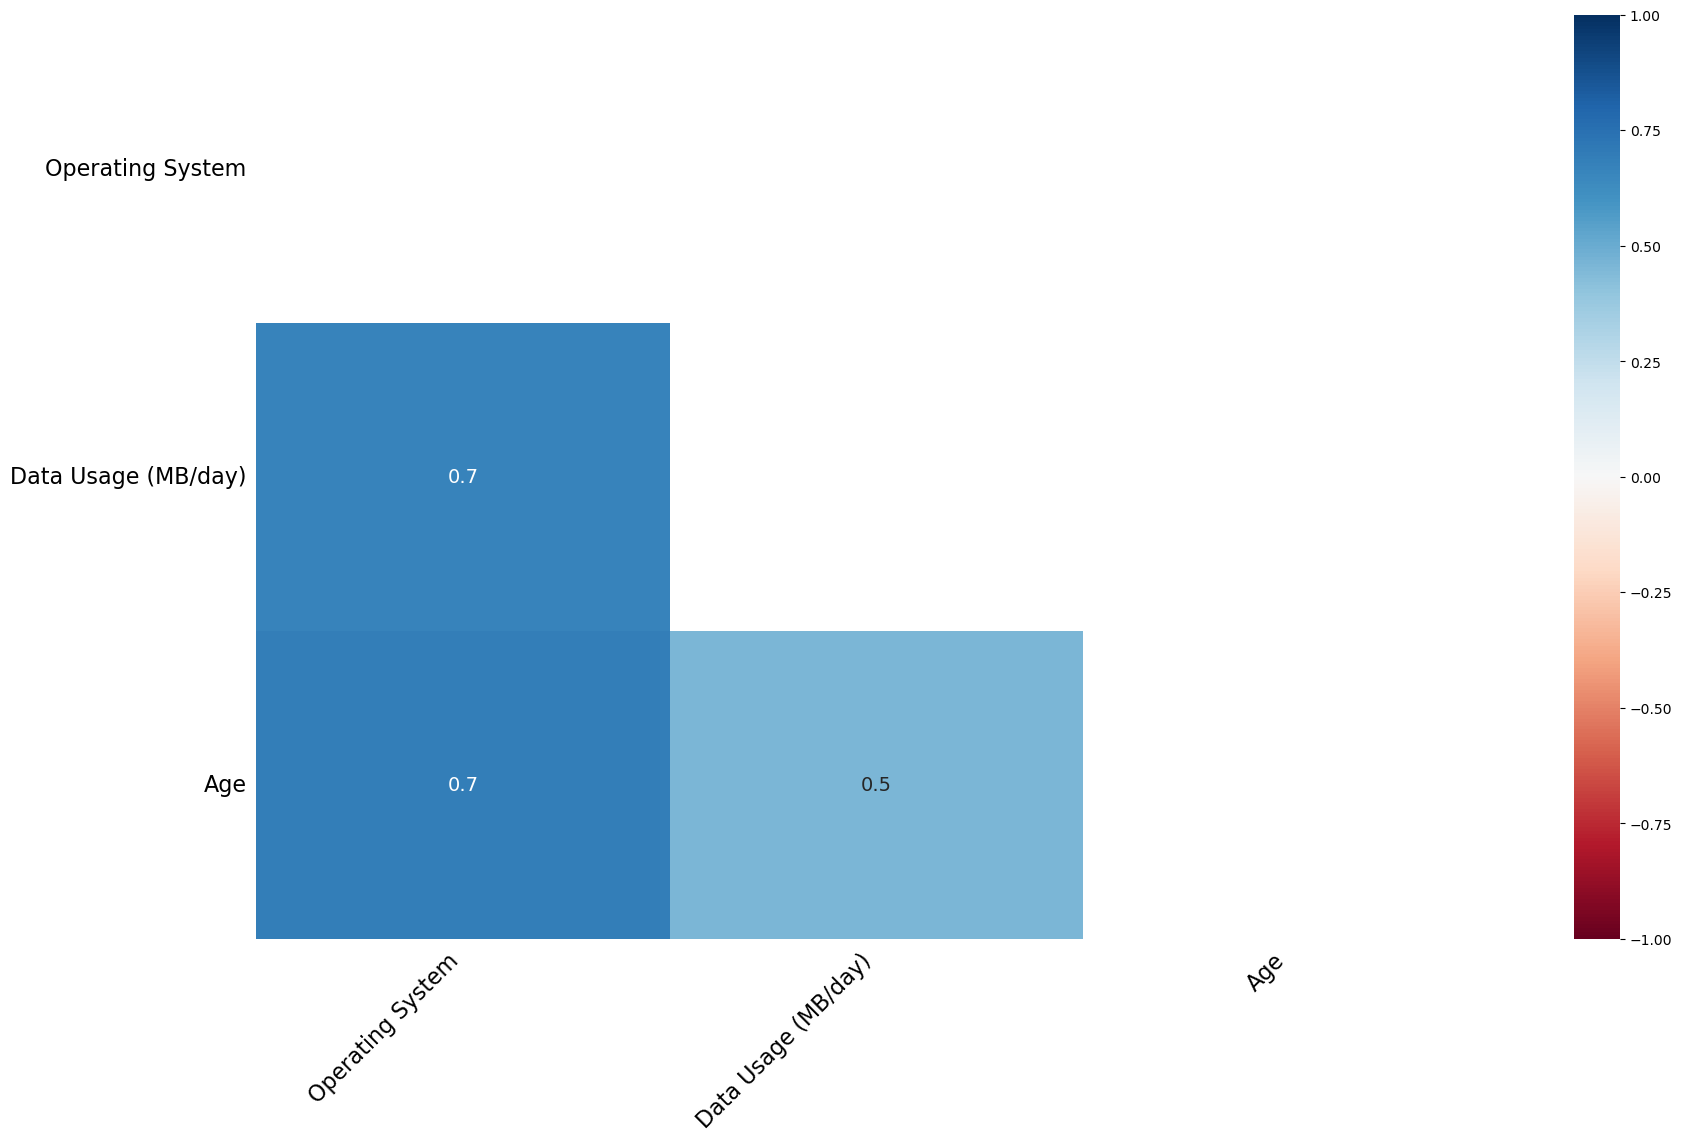

In [21]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

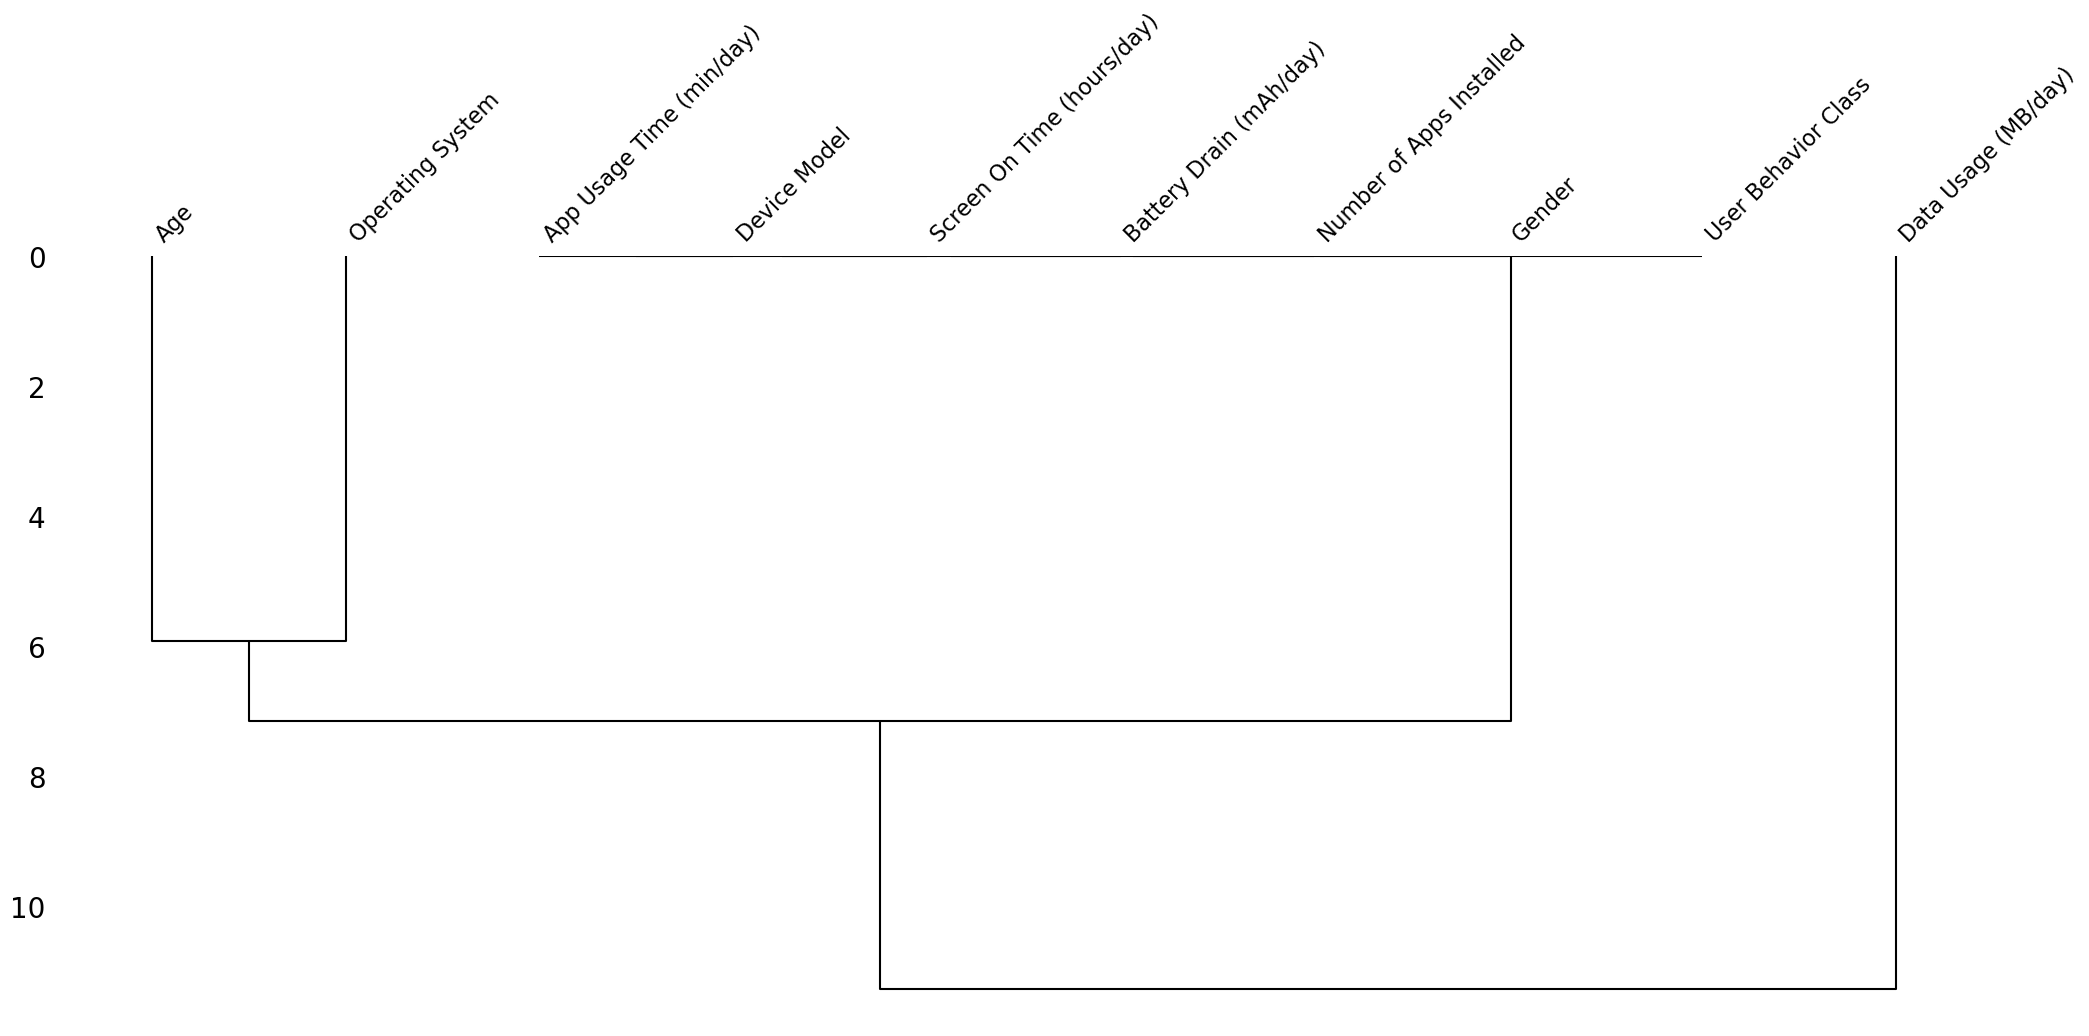

In [22]:
msno.dendrogram(data)
plt.show()

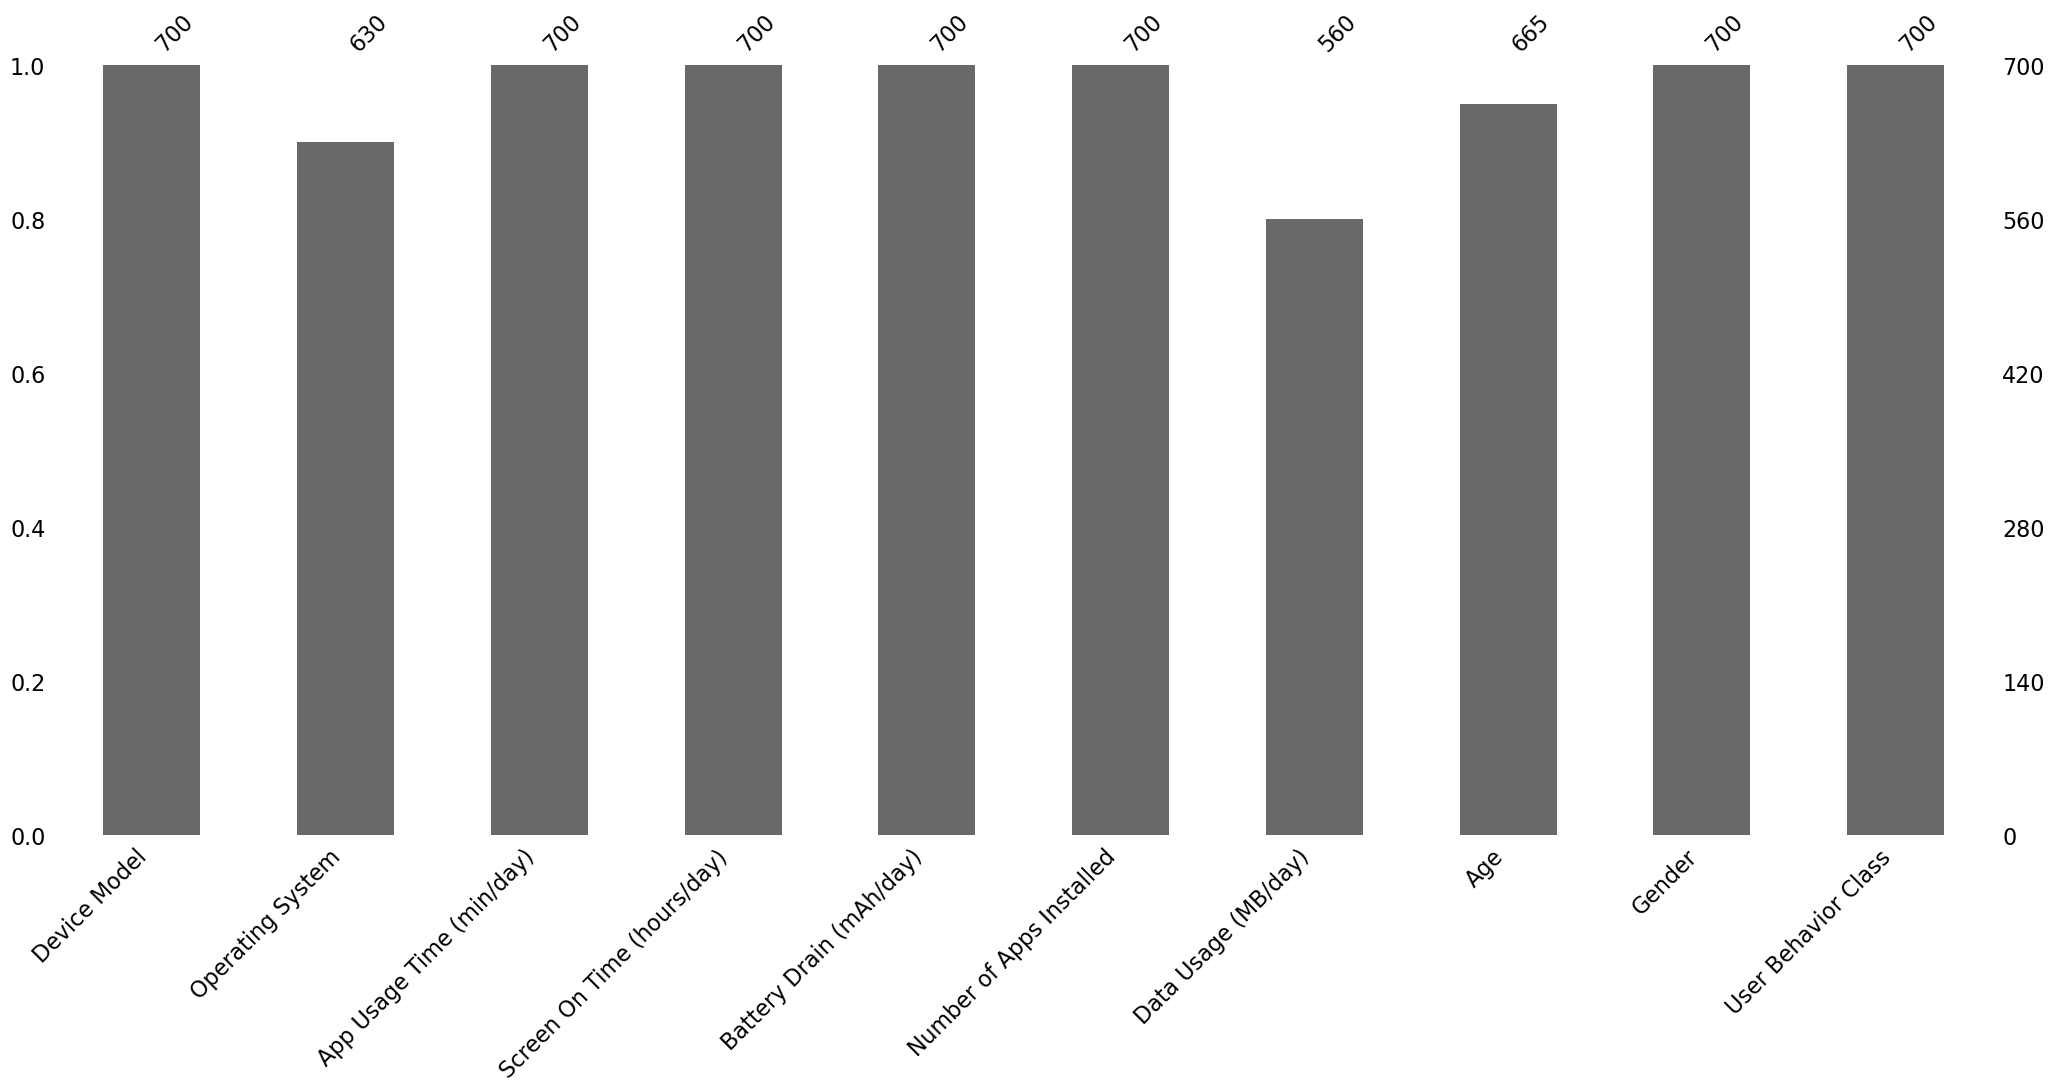

In [23]:
msno.bar(data)
plt.show()

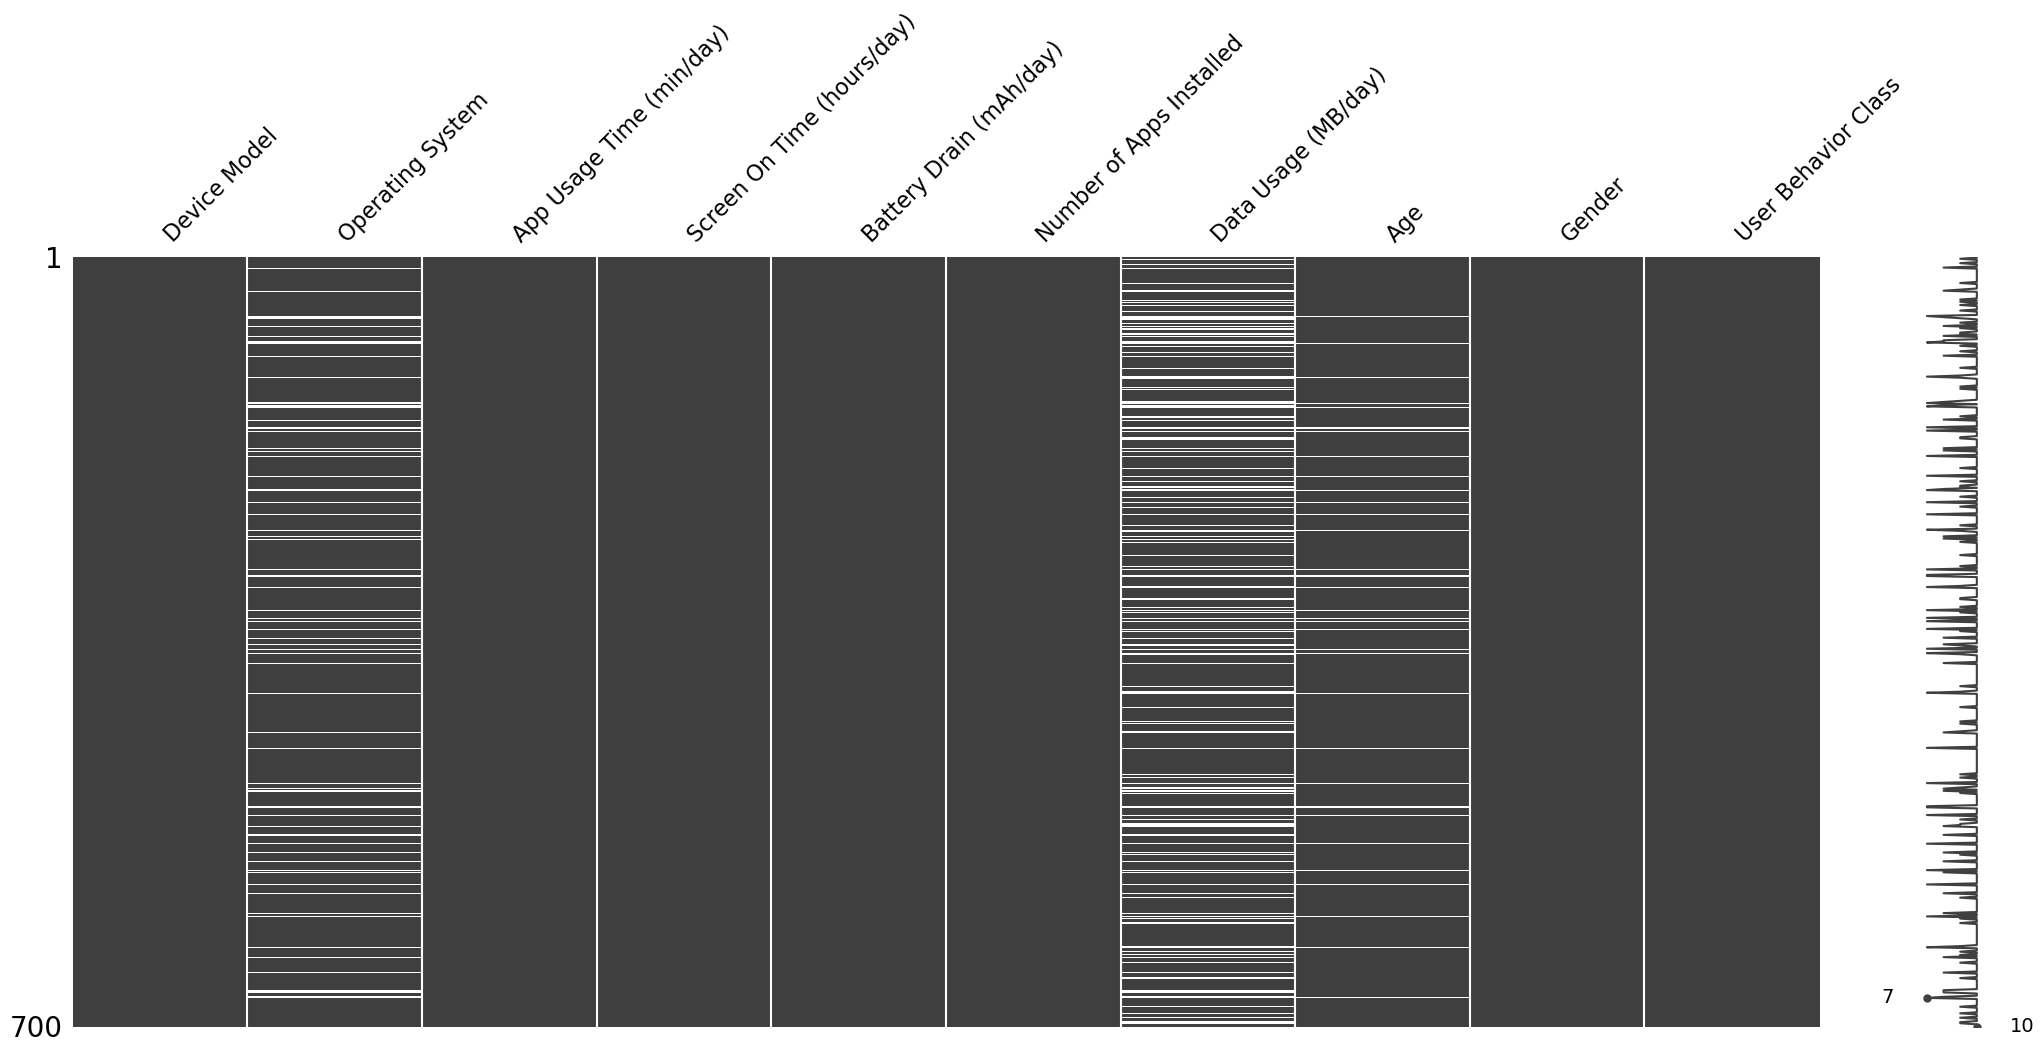

In [24]:
msno.matrix(data)
plt.show()

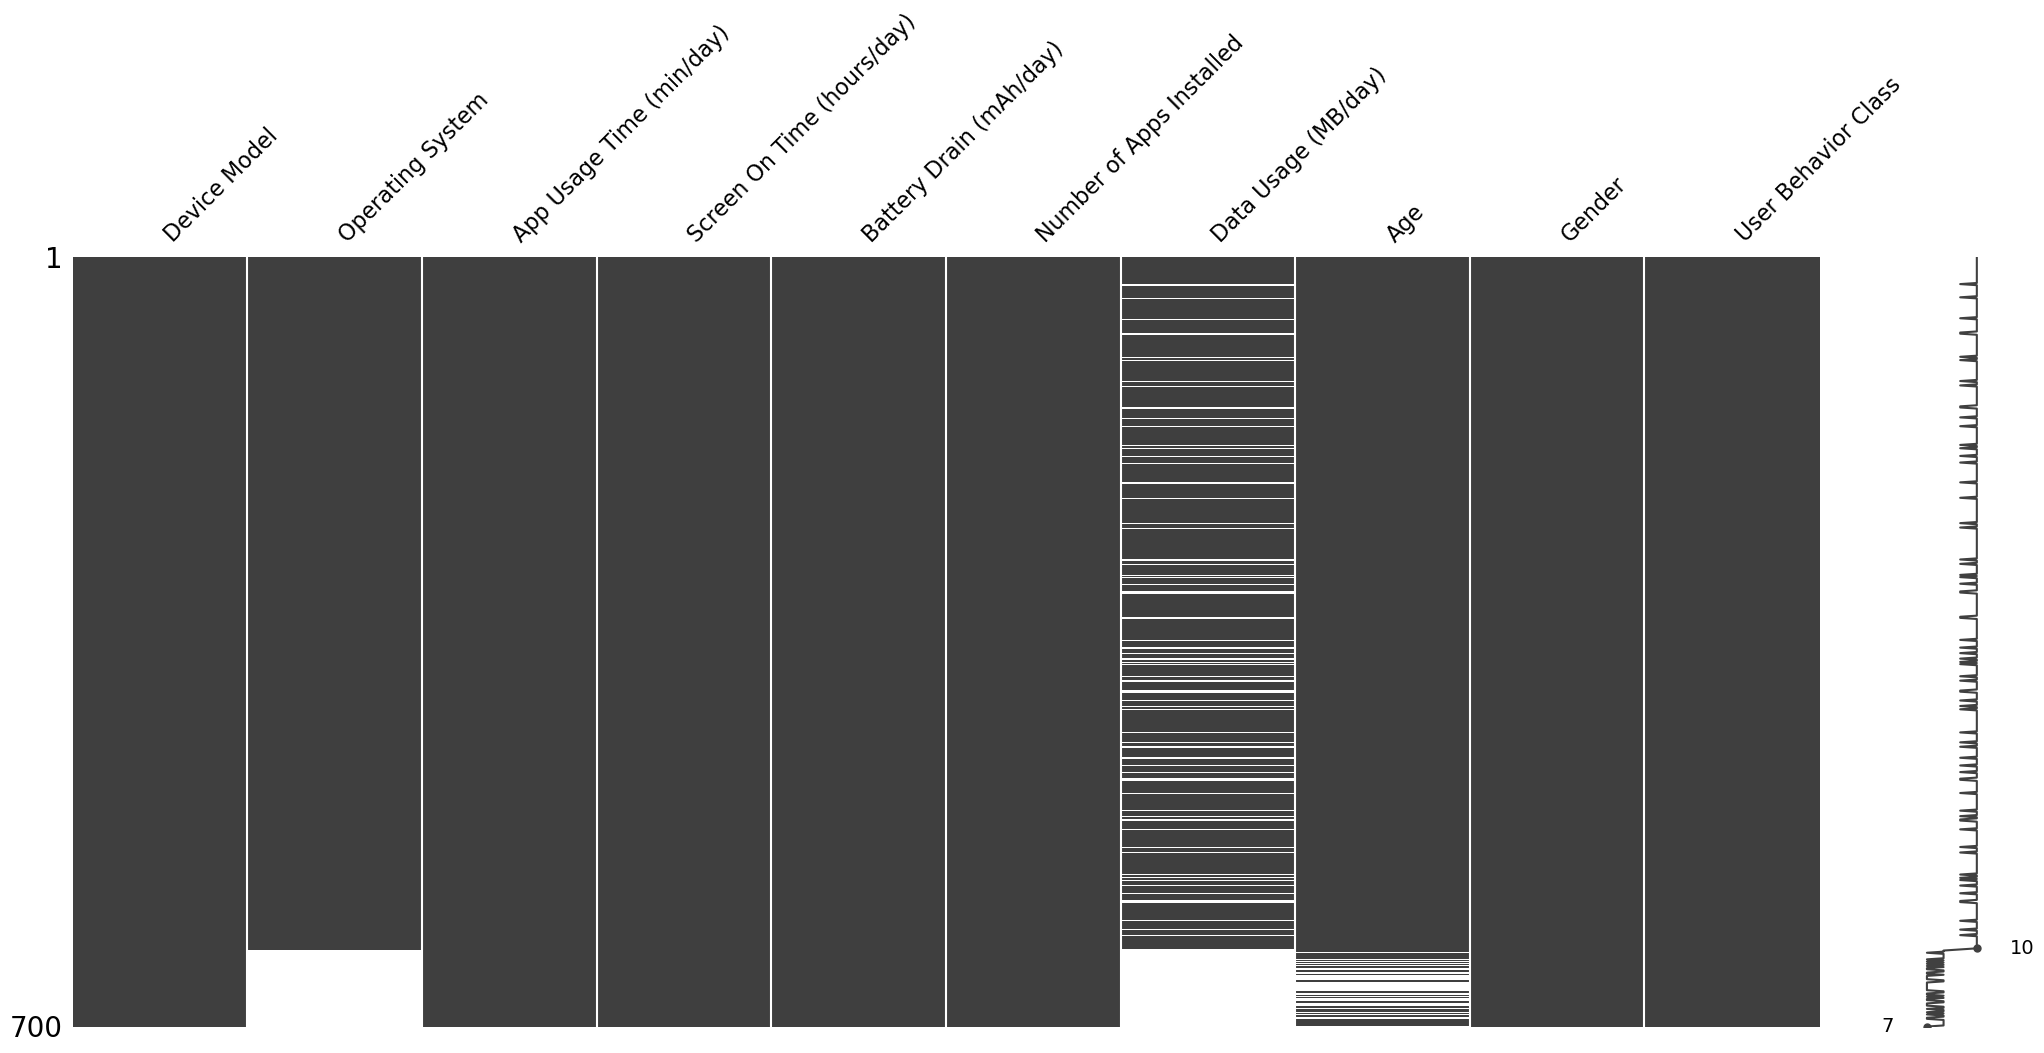

In [25]:
msno.matrix(data.sort_values('Operating System'))
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

## MISSING AT RANDOM

In [28]:
data.isnull().sum()

Device Model                    0
Operating System               70
App Usage Time (min/day)        0
Screen On Time (hours/day)      0
Battery Drain (mAh/day)         0
Number of Apps Installed        0
Data Usage (MB/day)           140
Age                            35
Gender                          0
User Behavior Class             0
dtype: int64

In [29]:
# Write your code here. Add as many boxes as you need.
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_imputed = knn_imputer.fit_transform(data)
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)
data_imputed

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0.0,0.0,393.0,6.4,1872.0,67.0,1122.0,40.0,1.0,4.0
1,1.0,0.0,268.0,4.7,1331.0,42.0,944.0,47.0,0.0,3.0
2,3.0,0.0,154.0,4.0,761.0,32.0,393.5,42.0,1.0,2.0
3,0.0,0.0,239.0,4.8,1676.0,56.0,871.0,20.0,1.0,3.0
4,4.0,1.0,187.0,4.3,1367.0,58.0,988.0,31.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
695,4.0,1.0,92.0,3.9,1082.0,26.0,470.0,22.0,1.0,2.0
696,3.0,0.0,316.0,6.8,1965.0,68.0,1311.0,59.0,1.0,4.0
697,0.0,0.0,99.0,3.1,942.0,22.0,457.0,50.0,0.0,2.0
698,2.0,0.0,62.0,1.7,431.0,13.0,224.0,44.0,1.0,1.0


In [30]:
data_imputed.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [32]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data_imputed[data_imputed.columns[:-1]],  data_imputed['User Behavior Class'], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [34]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [37]:
# Write your code here. Add as many boxes as you need.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train,Y_train)

Use the trained model to make predictions for the test set.

In [39]:
# Write your code here. Add as many boxes as you need.
y_pred = clf.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [41]:
# Write your code here. Add as many boxes as you need.
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 1.0


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[33  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 29  0  0]
 [ 0  0  0 24  0]
 [ 0  0  0  0 27]]
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        33
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        29
         4.0       1.00      1.00      1.00        24
         5.0       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [46]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data_imputed[data_imputed.columns[:-1]],  data_imputed['User Behavior Class'], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [48]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [50]:
# Write your code here. Add as many boxes as you need.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best score: 1.0


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [52]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score, classification_report

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Test accuracy: {test_accuracy}")
print("Classification report:\n", report)

Test accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00        10
         5.0       1.00      1.00      1.00        14

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

